In [ ]:
# Import packages.
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#--------TASK 1-------------
# Import data
dataset = np.genfromtxt("data_opt.csv", delimiter=',')
N=dataset.shape[0]
print("N =",N)
D = np.zeros([N, N])

for m in range(N):
    for n in range(N):
        D[m,n] = np.linalg.norm(dataset[m]-dataset[n])


print("D[2][3] =", D[2-1,3-1])
print("D[4][5] =", D[4-1,5-1])

max = 0
maximizer = np.array([0, 0])

for m in range(N):
    for n in range(N):
        if D[m,n] > max:
            max = D[m,n]
            maximizer = np.array([m, n])

print("Maximum distance =",max,", Maximizer pair of points =",maximizer+np.array([1, 1]))







N = 200
D[2][3] = 5.874898878227682
D[4][5] = 24.376910709439635
Maximum distance = 83.00299253869042 , Maximizer pair of points = [ 33 134]


In [ ]:

#--------TASK 2-----------
def MatrixToArray(M):   # (200,2) -> (400,1)
    return np.reshape(M,(M.shape[0]*M.shape[1],1))
    
def f(y):
    sum = 0
    for m in range(N):
        for n in range(m+1,N):
            sum = sum + (f_nm(n,m,y))**2
    return sum

def f_nm(n,m,y):
    return (np.linalg.norm(y[m]-y[n]) - D[m,n])

def f_nm_derivative(n,m,y):
    ret = np.zeros([N,y.shape[1]])
    ret[m] = (y[m]-y[n])/np.linalg.norm(y[m]-y[n])
    ret[n] = (y[n]-y[m])/np.linalg.norm(y[m]-y[n])
    return ret

def f_derivative(y):
    ret = np.zeros([N,y.shape[1]])
    for m in range(N):
        for n in range(m+1,N):
            ret = ret + 2*f_nm(n,m,y)*f_nm_derivative(n,m,y)
    return ret


def A(y, lam):
    p=0
    K = y.shape[1]
    ret = np.zeros([int((N**2-N)/2) , N*K])

    for m in range(N):
        for n in range(m+1,N):
            aux = np.transpose(MatrixToArray(f_nm_derivative(n,m,y)))
            ret[p] = aux
            p=p+1
    ret = np.vstack((ret, np.sqrt(lam)*np.identity(N*K)))
    return ret

def b(y, lam):
    p=0
    ret = np.zeros([int((N**2-N)/2),1])

    for m in range(N):
        for n in range(m+1,N):
            aux = np.transpose(MatrixToArray(f_nm_derivative(n,m,y))).dot(MatrixToArray(y)) - f_nm(n,m,y)
            ret[p] = aux
            p=p+1

    ret = np.vstack((ret, np.sqrt(lam)*MatrixToArray(y)))
    return ret

Iteration 0 , Gradient Norm = 720109.4641487176 , Cost Function = 661150394.8689866
Iteration 1 , Gradient Norm = 18812.707845334367 , Cost Function = 11793119.98411188
Iteration 2 , Gradient Norm = 15220.02436222567 , Cost Function = 10403624.701771272
Iteration 3 , Gradient Norm = 18721.75560948134 , Cost Function = 8860575.191300852
Iteration 4 , Gradient Norm = 23000.441415473502 , Cost Function = 6392880.594751062
Iteration 5 , Gradient Norm = 24210.062877488104 , Cost Function = 3754706.1334227757
Iteration 6 , Gradient Norm = 19830.53008587636 , Cost Function = 1850298.978575342
Iteration 7 , Gradient Norm = 8536.587404834425 , Cost Function = 899749.4215197325
Iteration 8 , Gradient Norm = 6102.622251272014 , Cost Function = 539349.5383339522
Iteration 9 , Gradient Norm = 4003.2439758771184 , Cost Function = 323305.5471158874
Iteration 10 , Gradient Norm = 3057.927796028759 , Cost Function = 206463.72464728498
Iteration 11 , Gradient Norm = 2846.335536566882 , Cost Function = 1

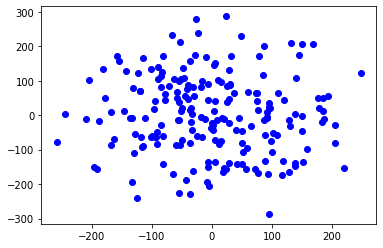

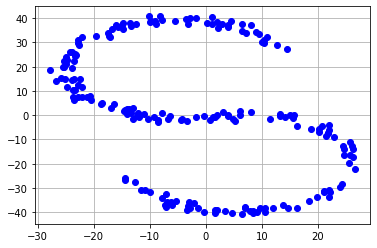

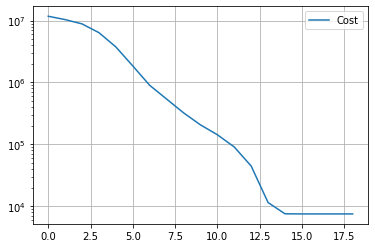

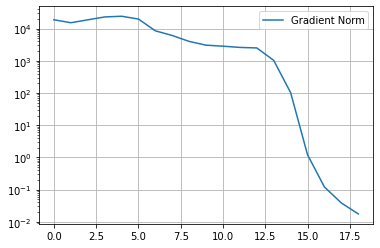

Iteration 0 , Gradient Norm = 790289.0872760864 , Cost Function = 792214867.0304902
Iteration 1 , Gradient Norm = 20239.938643449746 , Cost Function = 9729107.121604683
Iteration 2 , Gradient Norm = 22933.7426961561 , Cost Function = 6845820.874922959
Iteration 3 , Gradient Norm = 27819.866673362096 , Cost Function = 2871771.988312802
Iteration 4 , Gradient Norm = 15225.105978123316 , Cost Function = 835534.9299311743
Iteration 5 , Gradient Norm = 8177.615854842555 , Cost Function = 187993.92507645887
Iteration 6 , Gradient Norm = 2813.761692837339 , Cost Function = 23492.134345208866
Iteration 7 , Gradient Norm = 378.87218388939806 , Cost Function = 4132.67801800215
Iteration 8 , Gradient Norm = 65.51333812516324 , Cost Function = 3458.1566508456362
Iteration 9 , Gradient Norm = 39.43312616963041 , Cost Function = 3302.7269530210538
Iteration 10 , Gradient Norm = 32.71251743499231 , Cost Function = 3212.5808777374696
Iteration 11 , Gradient Norm = 22.44679910705285 , Cost Function = 3

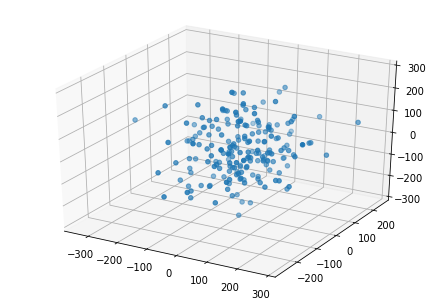

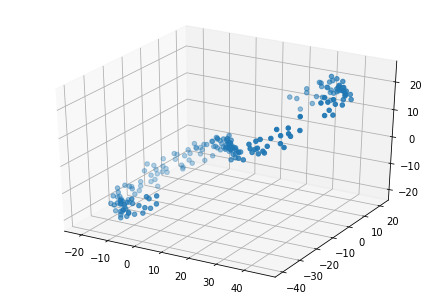

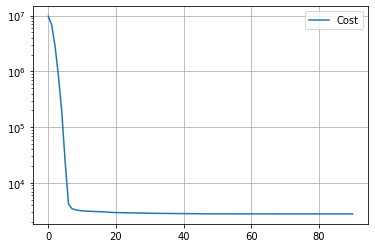

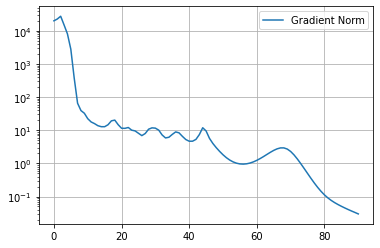

In [ ]:

#--------TASK 3-------------


def LM(lambda_0, epsilon, k, y_init):
    lambda_i = lambda_0

    y_i = y_init.reshape(N, k)

    fig = plt.figure()
    if k ==2:
        plt.plot(y_i[:,0], y_i[:,1], 'bo')
    elif k==3:
        ax = Axes3D(fig)
        ax.scatter(y_i[:,0], y_i[:,1],y_i[:,2], 'bo')


    i=0
    
    cost = []
    gradient_norm = []
    while True:
        g_i = f_derivative(y_i)
        print("Iteration",i,", Gradient Norm =",np.linalg.norm(g_i),", Cost Function =", f(y_i))
        if np.linalg.norm(g_i) < epsilon:
            break
        
        A_i = A(y_i, lambda_i)
        b_i = b(y_i, lambda_i)
        y_hat,_,_,_ = np.linalg.lstsq(A_i,b_i,rcond=None) #np.linalg.inv(np.transpose(A_i).dot(A_i)).dot(np.transpose(A_i)).dot(b_i)
        y_hat = y_hat.reshape(N, k)
        if f(y_hat) < f(y_i):
            y_i = y_hat
            lambda_i = 0.7*lambda_i
        else:
            lambda_i = 2*lambda_i 
        i=i+1
        cost = np.append(cost, f(y_i))
        gradient_norm = np.append(gradient_norm, np.linalg.norm(f_derivative(y_i)))
   
    fig = plt.figure()
    if k==2:
        plt.plot(y_i[:,0], y_i[:,1], 'bo')
    
    else:
        ax = Axes3D(fig)
        ax.scatter(y_i[:,0], y_i[:,1],y_i[:,2], 'bo')
    plt.grid()
    plt.figure()
    plt.plot(range(cost.shape[0]), cost, label='Cost')
    plt.yscale("log")
    plt.grid()
    plt.legend()
    plt.figure()
    plt.plot(range(gradient_norm.shape[0]), gradient_norm, label = 'Gradient Norm')
    plt.grid()
    plt.yscale("log")
    plt.legend()
    
    


y_init = np.genfromtxt('yinit2.csv', delimiter=',')
LM(1, 10**-2 * 2, 2, y_init)
plt.show()
y_init = np.genfromtxt('yinit3.csv', delimiter=',')
LM(1, 10**-2 * 3, 3, y_init)
plt.show()

N = 169
Iteration 0 , Gradient Norm = 527793.2122411788 , Cost Function = 418998432.0792913
Iteration 1 , Gradient Norm = 9766.029376130398 , Cost Function = 6839165.926128884
Iteration 2 , Gradient Norm = 6827.750558233215 , Cost Function = 6648601.213402403
Iteration 3 , Gradient Norm = 4733.390913711885 , Cost Function = 6543497.861449432
Iteration 4 , Gradient Norm = 4019.101008792163 , Cost Function = 6488400.933686592
Iteration 5 , Gradient Norm = 4019.101008792163 , Cost Function = 6488400.933686592
Iteration 6 , Gradient Norm = 33459.94515198049 , Cost Function = 6412084.299096602
Iteration 7 , Gradient Norm = 17876.465307095263 , Cost Function = 2987183.414023832
Iteration 8 , Gradient Norm = 11047.340858086165 , Cost Function = 1687372.9800383693
Iteration 9 , Gradient Norm = 7679.002092053184 , Cost Function = 1117136.5621717675
Iteration 10 , Gradient Norm = 6177.845566576159 , Cost Function = 799762.4779452004
Iteration 11 , Gradient Norm = 5025.213420838546 , Cost Functio

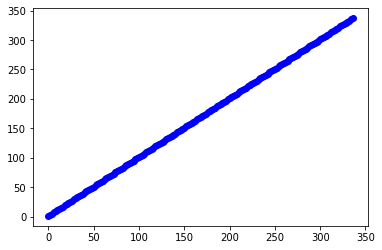

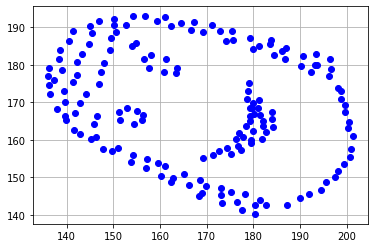

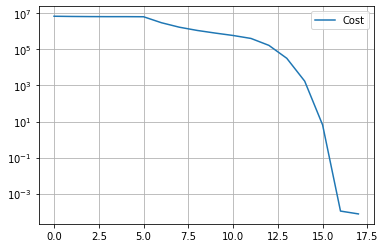

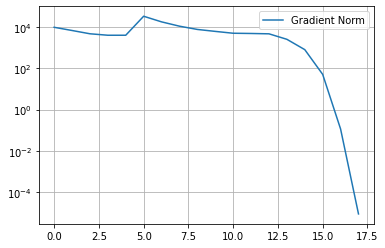

Iteration 0 , Gradient Norm = 527793.2122411788 , Cost Function = 418998432.0792913
Iteration 1 , Gradient Norm = 9766.02937613038 , Cost Function = 6839165.926128887
Iteration 2 , Gradient Norm = 6827.750558233368 , Cost Function = 6648601.213402398
Iteration 3 , Gradient Norm = 4733.390911182722 , Cost Function = 6543497.861455019
Iteration 4 , Gradient Norm = 3996.873099229598 , Cost Function = 6488454.744745516
Iteration 5 , Gradient Norm = 3996.873099229598 , Cost Function = 6488454.744745516
Iteration 6 , Gradient Norm = 22539.483310312404 , Cost Function = 5919709.31428596
Iteration 7 , Gradient Norm = 12870.256213011413 , Cost Function = 4088341.145962344
Iteration 8 , Gradient Norm = 12292.66816891736 , Cost Function = 3126176.0386037175
Iteration 9 , Gradient Norm = 12811.844073996443 , Cost Function = 2013764.1590991847
Iteration 10 , Gradient Norm = 11295.414296795658 , Cost Function = 1203699.148429815
Iteration 11 , Gradient Norm = 5061.840265372412 , Cost Function = 8204

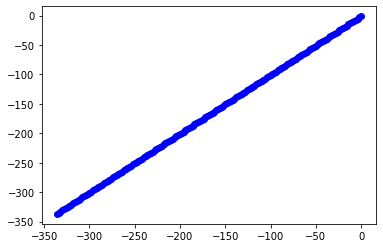

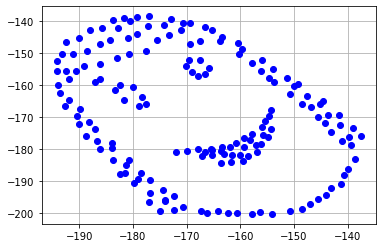

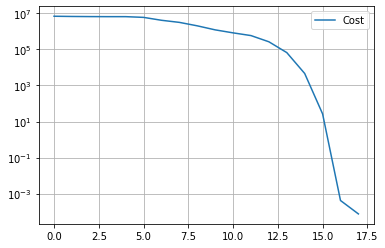

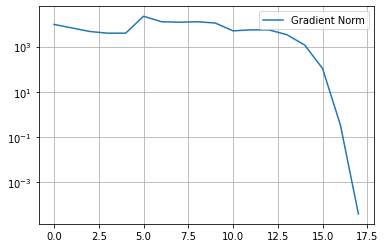

Iteration 0 , Gradient Norm = 282984.69417072006 , Cost Function = 123709187.30096877
Iteration 1 , Gradient Norm = 11265.47499940908 , Cost Function = 4741442.131904004
Iteration 2 , Gradient Norm = 10071.26915238644 , Cost Function = 4099582.053799714
Iteration 3 , Gradient Norm = 11564.215504959962 , Cost Function = 3358369.587714274
Iteration 4 , Gradient Norm = 11979.6224630059 , Cost Function = 2458492.1886767996
Iteration 5 , Gradient Norm = 9351.245255394682 , Cost Function = 1699193.7826441114
Iteration 6 , Gradient Norm = 6842.1533216710595 , Cost Function = 1277843.5050822773
Iteration 7 , Gradient Norm = 4415.237329938302 , Cost Function = 1078962.3960722669
Iteration 8 , Gradient Norm = 1856.2143478800806 , Cost Function = 1008217.9021258582
Iteration 9 , Gradient Norm = 1240.0027461800057 , Cost Function = 986203.4459729497
Iteration 10 , Gradient Norm = 920.6994262301945 , Cost Function = 973414.0280295609
Iteration 11 , Gradient Norm = 680.9157910059585 , Cost Function 

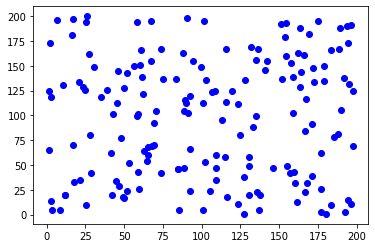

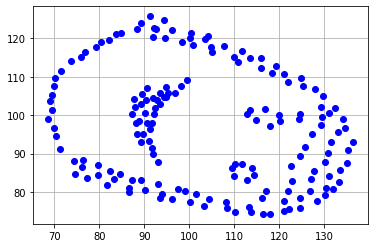

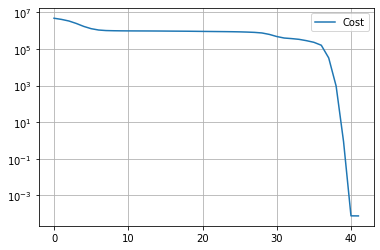

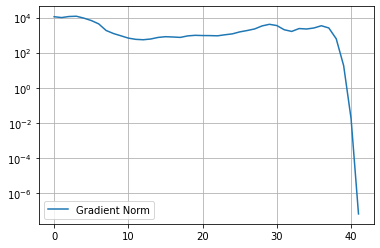

In [ ]:

#------------TASK 4--------------------
dataset = np.genfromtxt("dataProj.csv", delimiter=',')
N=dataset.shape[0]
print("N =",N)
D = np.zeros([N, N])

for m in range(N):
    for n in range(N):
        D[m,n] = np.linalg.norm(dataset[m]-dataset[n])

k=2
lambda_0 = 1
epsilon = k*10**(-4)

y_init = np.array(range(N*k))
LM(lambda_0, epsilon, k, y_init)
plt.show()


y_init = -np.array(range(N*k))
LM(lambda_0, epsilon, k, y_init)
plt.show()

y_init = np.random.rand(N*k)*200
LM(lambda_0, epsilon, k, y_init)
plt.show()